In [207]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata

In [4]:
from matplotlib import pylab as plt

In [5]:
data = pd.read_csv('featurama/sample_data/titanic.csv')
train = data.iloc[0:600]
test = data.iloc[600:890]

In [226]:
class EmpiricalCdf:
    def __init__(self, X, bins=None):
        self.x = np.sort(X)
        self.P = np.cumsum(np.ones(shape=self.x.shape))/len(self.x)
        
    def cdf(self, x):
        return np.interp(x, self.x, self.P)*(x > self.x[0]) 
    
    def inverse_cdf(self, P):
        return np.interp(P, self.P, self.x)
        
class InverseEmpiricalCDFTransform:
    def __init__(self, bins=None):
        self.bins = bins
        self._CDFs = {}
        
    def fit(self, X, y=None):
        X = np.array(X)
        if len(X.shape) == 1:
            X = np.reshape(X, (len(X), 1))
        for i in range(X.shape[1]):
            self._CDFs[i] = EmpiricalCdf(X[:,i], bins=self.bins)
            
    def transform(self, X):
        X = np.array(X)
        shape = X.shape
        if len(X.shape) == 1:
            X = np.reshape(X, (len(X), 1))
        X_out = []
        for i in range(X.shape[1]):
            X_out.append(self._CDFs[i].cdf(X[:,i]))
        X_out = np.stack(X_out, axis=1)
        return np.reshape(X_out, shape)
    
    def inverse_transform(self, X):
        X = np.array(X)
        shape = X.shape
        if len(X.shape) == 1:
            X = np.reshape(X, (len(X), 1))
        X_out = []
        for i in range(X.shape[1]):
            X_out.append(self._CDFs[i].inverse_cdf(X[:,i]))
        X_out = np.stack(X_out, axis=1)
        return np.reshape(X_out, shape) 


In [227]:
tr = InverseEmpiricalCDFTransform()
tr.fit(train.Fare)

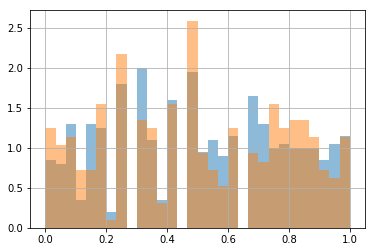

In [228]:
plt.hist(tr.transform(train.Fare), bins=30, density=True, alpha=0.5)
plt.hist(tr.transform(test.Fare), bins=30, density=True, alpha=0.5)
plt.grid()
plt.show()

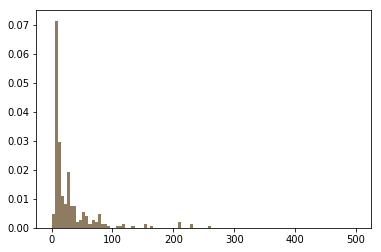

In [234]:
plt.hist(test.Fare, bins=np.linspace(0,500,100), density=True, alpha=1.0)
plt.hist(tr.inverse_transform(tr.transform(test.Fare)), bins=np.linspace(0,500,100), density=True, alpha=0.5)
plt.show()

In [237]:
np.max(np.abs(tr.inverse_transform(tr.transform(train.Fare)) - train.Fare))

0.0

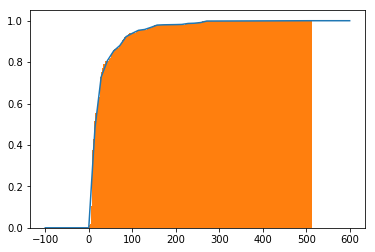

In [231]:
x = np.linspace(-100,600)
y = tr.transform(x)

plt.plot(x,y)
plt.hist(train.Fare, density=True, cumulative=True, bins=200)
plt.show()

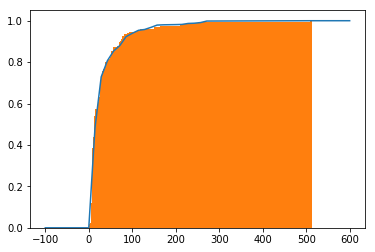

In [232]:
x = np.linspace(-100,600)
y = tr.transform(x)

plt.plot(x,y)
plt.hist(test.Fare, density=True, cumulative=True, bins=200)
plt.show()